# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [92]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [93]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [94]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

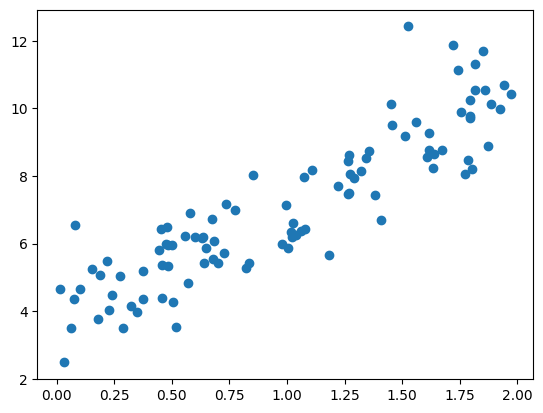

In [95]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [96]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [97]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [98]:
#X_fit[]

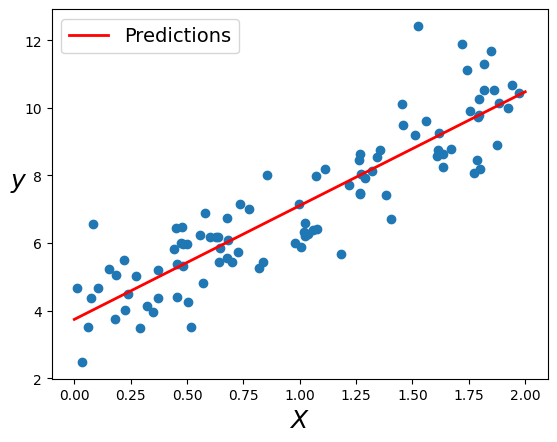

In [99]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [100]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [101]:
X_new.shape

(2, 1)

In [102]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [103]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [104]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ 
to 
$$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [105]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

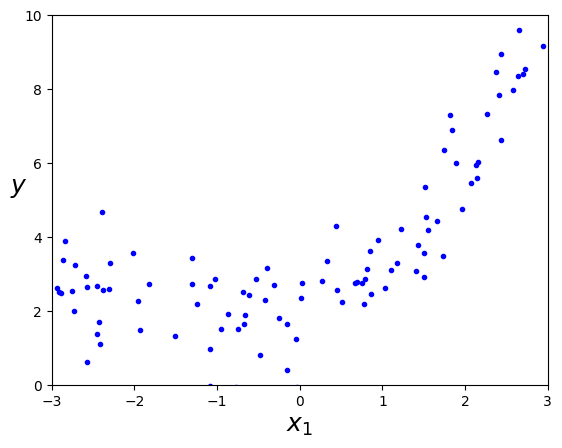

In [106]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [107]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [108]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [109]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [110]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [111]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [112]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

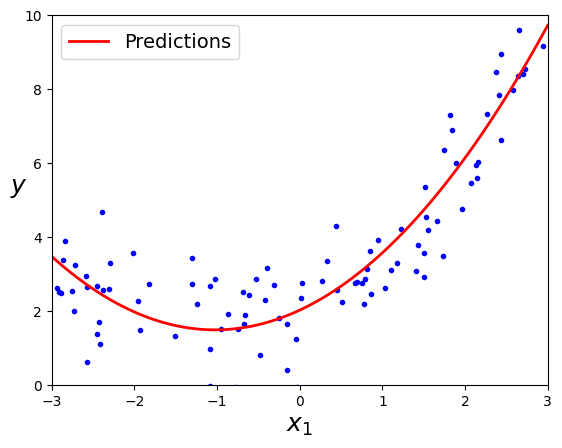

In [113]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [114]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [115]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [116]:
len(X)

1000

In [117]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

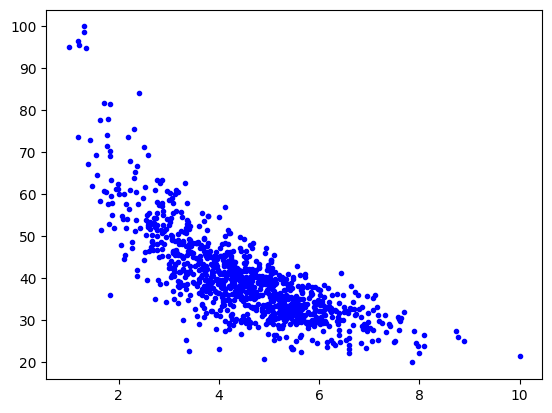

In [118]:
plt.plot(X,y,'b.')

Partición de los datos

In [119]:
from sklearn.model_selection import train_test_split
Xt, Xv, yt, yv = train_test_split(X, y, test_size= 0.4)

In [120]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(Xt, yt)
y_pred = lr.predict(Xv)

Visualización

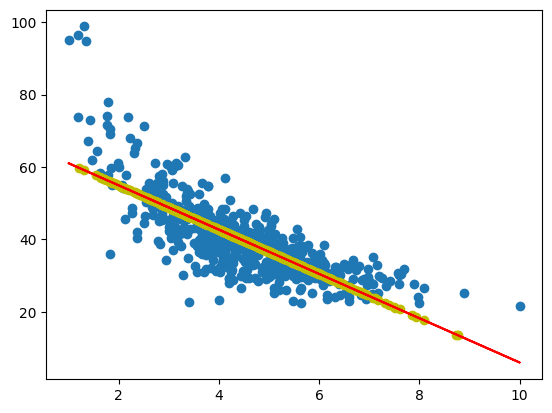

In [121]:
plt.scatter(Xt, yt)
plt.scatter(Xv, y_pred, color = 'y')
plt.plot(Xt, lr.predict(Xt), color = 'red')
plt.show()

In [122]:
print(f'Ecuación de la recta: {lr.coef_[0]}X + {lr.intercept_}') 

Ecuación de la recta: -6.108154164617275X + 67.14267045766083


In [123]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(yv, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yv, y_pred)))
print('r2_score',r2_score(yv, y_pred))

Error medio Absoluto (MAE): 5.165392298156572
Root Mean Squared Error: 7.156471117316963
r2_score 0.5540265533328437


In [124]:
from sklearn.preprocessing import PolynomialFeatures

res = pd.DataFrame({'degree': [*range(1,10)]})
mae = []
rmse = []
r2= []
for d in range(1,10):
    Polyfeature = PolynomialFeatures(degree=d)
    Xt_pol = Polyfeature.fit_transform(Xt)
    Xv_pol = Polyfeature.fit_transform(Xv)

    lr_p = LinearRegression(fit_intercept= True)
    lr_p.fit(Xt_pol, yt)
    y_pred_poly = lr_p.predict(Xv_pol)
    
    mae.append(metrics.mean_absolute_error(yv, y_pred_poly))
    rmse.append(np.sqrt(metrics.mean_squared_error(yv, y_pred_poly)))
    r2.append(r2_score(yv, y_pred_poly))

res['mae'] = mae
res['rmse'] = rmse
res['r2'] = r2

res



,degree,mae,rmse,r2
0,1,5.165392,7.156471,0.554027
1,2,4.869346,6.456351,0.637018
2,3,4.774958,6.244579,0.660439
3,4,4.746923,6.195034,0.665806
4,5,4.726052,6.185080,0.666879
5,6,4.702735,6.163803,0.669167
6,7,4.697009,6.157080,0.669888
7,8,4.722329,6.164333,0.669110
8,9,4.717189,6.160198,0.669554


Se ve como en 7 dejan de bajar por lo que ahí pondremos el grado a nuestra transformación

In [125]:
Polyfeature_f = PolynomialFeatures(degree=7, include_bias=False)
Xt_pol = Polyfeature_f.fit_transform(Xt)
Xv_pol = Polyfeature_f.fit_transform(Xv)

lr_p = LinearRegression(fit_intercept= True)
lr_p.fit(Xt_pol, yt)

y_pred_poly = lr_p.predict(Xv_pol)

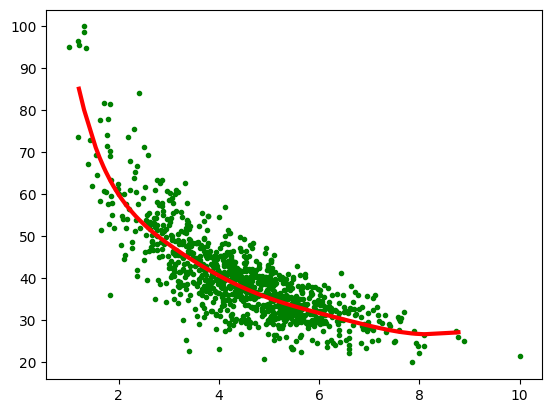

In [126]:
order = np.argsort(Xv.values.ravel())

sortedXPoly = Xv.values.ravel()[order]
sortedYPoly = yv.values.ravel()[order]
sorted_predicPoly = y_pred_poly[order]

plt.plot(X, y, "g.")
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=3)

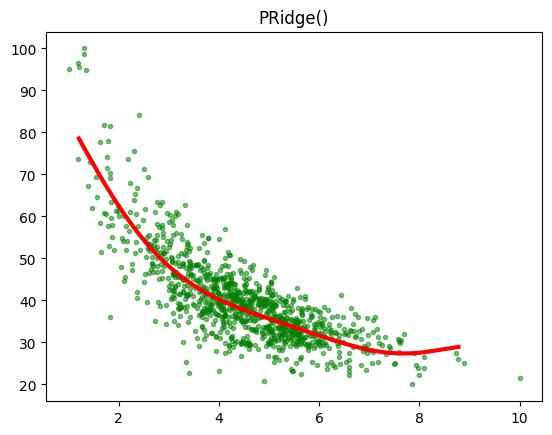

c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.295e+04, tolerance: 6.607e+00
  model = cd_fast.enet_coordinate_descent(


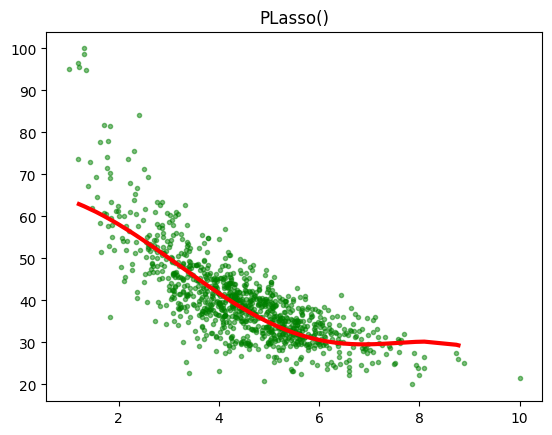

c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.288e+04, tolerance: 6.607e+00
  model = cd_fast.enet_coordinate_descent(


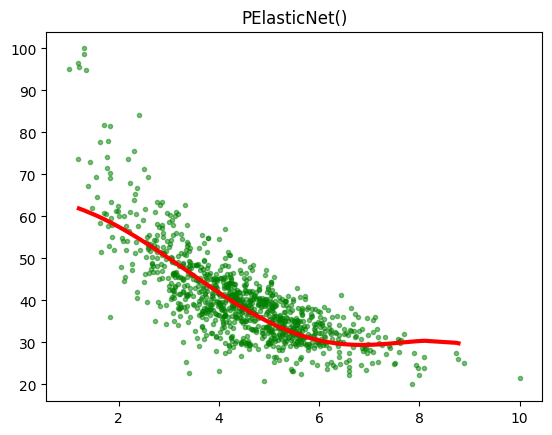

In [127]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
modelos = [Ridge(), Lasso(), ElasticNet()]

res = pd.DataFrame({'modelo': modelos})
mae = []
rmse = []
r2= []

for m in modelos:
    lr = m.fit(Xt_pol, yt)
    y_pred = lr.predict(Xv_pol)

    order = np.argsort(Xv.values.ravel())
    # print(order)
    sortedXPoly = Xv.values.ravel()[order]
    sortedYPoly = yv.values.ravel()[order]
    # print(sortedYPoly)
    sorted_predicPoly = y_pred[order]
    



    mae.append(metrics.mean_absolute_error(yv, y_pred))
    rmse.append(np.sqrt(metrics.mean_squared_error(yv, y_pred)))
    r2.append(r2_score(yv, y_pred))

    

    plt.plot(X, y, "g.", alpha= 0.5)
    plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=3)
    plt.title(f'P{str(m)}')
    plt.show()

res['mae'] = mae
res['rmse'] = rmse
res['r2'] = r2
        

In [128]:
res

,modelo,mae,rmse,r2
0,Ridge(),4.782045,6.240229,0.660912
1,Lasso(),4.907280,6.721490,0.606593
2,ElasticNet(),4.926158,6.778065,0.599942


Como podemos ver ya teníamos buenos resultados solo con la regresión Polinomial pero ahora vemos que el ajuste bueno pero ahora tendíamos que ver que las métricas mejoran con Ridge lo que es entendible debido al grado que ahora son multiplicados los pesos de cada ajuste

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [129]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2009,2472930270,20140905T000000,485000.0,3,2.50,3110,9015,2.0,0,0,...,9,3110,0,1990,0,98058,47.4369,-122.147,2650,8960
10936,8562750060,20150420T000000,825000.0,5,3.50,4140,6770,2.0,0,0,...,9,3030,1110,2004,0,98027,47.5381,-122.069,3960,5431
17749,7934000090,20150225T000000,340000.0,2,1.00,690,5200,1.0,0,0,...,6,690,0,1918,0,98136,47.5560,-122.395,1380,5700
20488,8691440220,20150202T000000,1289990.0,5,4.00,4360,8030,2.0,0,0,...,10,4360,0,2015,0,98075,47.5923,-121.973,3570,6185
9439,4302201085,20140918T000000,248000.0,3,1.00,1470,7680,1.0,0,0,...,7,1220,250,1946,0,98106,47.5276,-122.359,1470,6784
19890,5045700400,20150223T000000,559950.0,5,2.75,2990,6370,2.0,0,0,...,8,2990,0,2014,0,98059,47.4853,-122.154,2730,5740
5076,5100402764,20150415T000000,740000.0,3,1.00,1230,6380,1.5,0,0,...,7,1230,0,1927,0,98115,47.6947,-122.315,1250,6380
235,1762600320,20140610T000000,1025000.0,5,4.00,3760,28040,2.0,0,0,...,10,3760,0,1983,0,98033,47.6489,-122.183,3430,35096
3381,7854800090,20141107T000000,799950.0,3,3.00,2900,11769,2.0,0,0,...,10,2900,0,1997,0,98052,47.6993,-122.118,2900,9611
13497,1657530450,20141222T000000,289950.0,3,2.50,1870,1436,2.0,0,0,...,7,1870,0,2004,0,98059,47.4899,-122.166,1720,1852


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [131]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [132]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


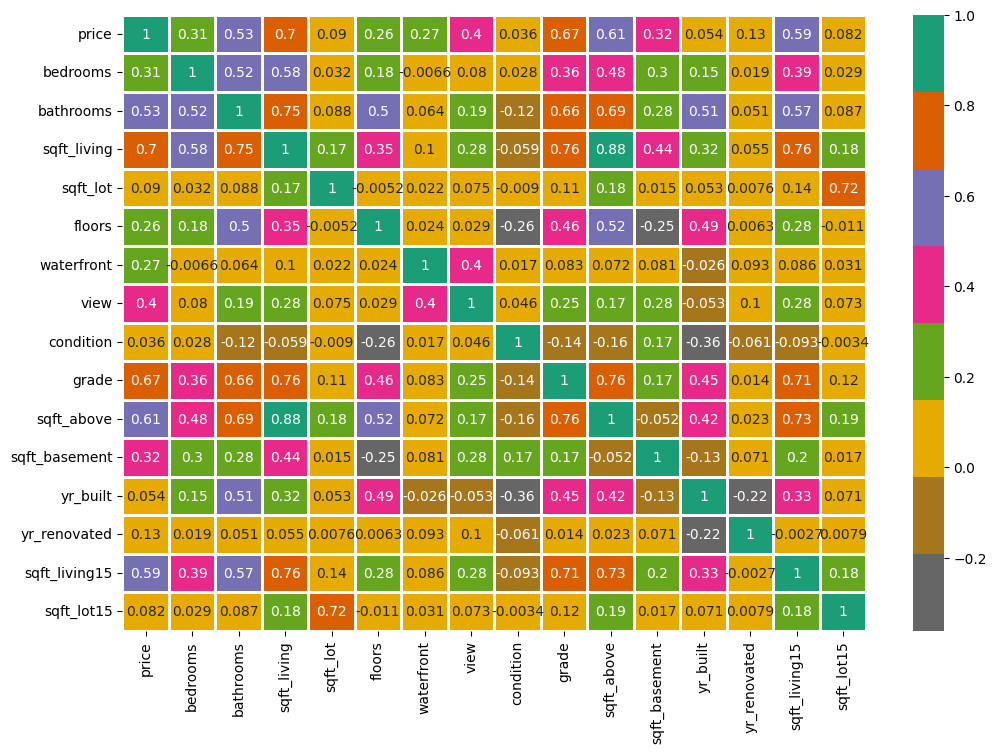

In [133]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [134]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label[0]]

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [137]:
res = pd.DataFrame()

mae = []
rmse = []
r2= []
degrees = []
mmmodels = []


for d in range(1,2):
    for m in modelos:
        degrees.append(d)
        Polyfeatures = PolynomialFeatures(degree=d)
        Xt_pol = Polyfeatures.fit_transform(X_train)
        Xv_pol = Polyfeatures.fit_transform(X_test)

        mmmodels.append(m)
        lr = m.fit(Xt_pol, y_train)
        y_pred = lr.predict(Xv_pol)

        order_it = np.argsort(X_test.values.ravel())
        sortedXPoly = X_test.values.ravel()[order_it]
        sortedYPoly = y_test.values.ravel()[order_it]
        # sorted_predicPoly = y_pred[order]
        



        # mae.append(metrics.mean_absolute_error(y_test, y_pred))
        # rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        # r2.append(r2_score(y_test, y_pred))

        

        # plt.plot(X, y, "g.", alpha= 0.5)
        # plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=3)
        # plt.title(f'Model:{str(m)}, degree: {d}')
        # plt.show()


# res['degree'] = degrees
# res['model'] = mmmodels

# res['mae'] = mae
# res['rmse'] = rmse
# res['r2'] = r2


res

IndexError: index 10550 is out of bounds for axis 0 with size 2162